<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/09-Feature-Engineering/01-My_Dealing-with-Missing-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns


In [2]:
with open ('/content/Ames_Housing_Feature_Description.txt','r') as f:
  print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
df = pd.read_csv('/content/Ames_outliers_removed.csv')

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
len(df.columns)

81

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [7]:
df = df.drop('PID', axis=1)

In [8]:
len(df)

2927

In [9]:
len(df.columns)

80

In [10]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [11]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [12]:
df.isnull().sum()/len(df) * 100

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [13]:
def percent_missing(df):
  percent_nan = df.isnull().sum()/len(df) * 100
  percent_nan = percent_nan[percent_nan>0].sort_values()
  return percent_nan

In [14]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

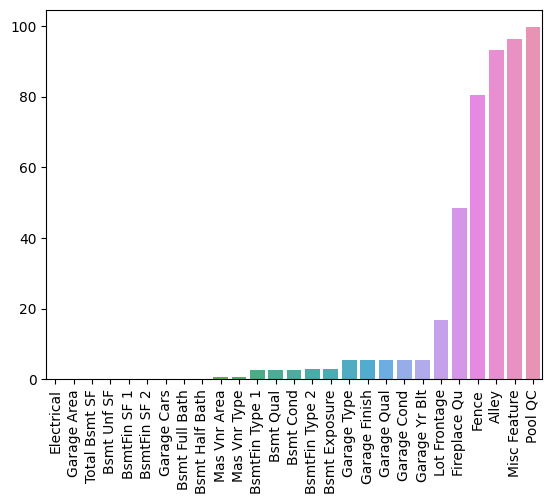

In [15]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

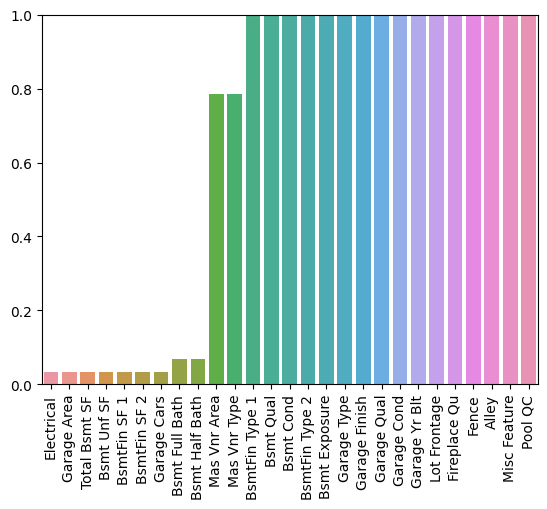

In [16]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

plt.ylim(0,1);

In [17]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [18]:
100/len(df)

0.0341646737273659

In [19]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [20]:
df.iloc[1341]['Total Bsmt SF']

nan

In [21]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [22]:
df.iloc[1497]['Total Bsmt SF']

0.0

In [23]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [24]:
df = df[['Bsmt Half Bath', 'Bsmt Full Bath']].fillna(0)

In [25]:
percent_missing(df)
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [26]:
bsmt_num_cols = ['Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Full Bath', 'Bsmt Half Bath']


In [27]:
df

,Bsmt Half Bath,Bsmt Full Bath
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
2922,0.0,1.0
2923,0.0,1.0
2924,1.0,0.0
2925,0.0,1.0


In [29]:
df = pd.read_csv('/content/Ames_outliers_removed.csv')
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [30]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

In [31]:
percent_missing(df)
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

In [32]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [33]:
percent_nan = percent_missing(df)

In [34]:
percent_nan

Electrical        0.034165
Garage Cars       0.034165
Garage Area       0.034165
Mas Vnr Type      0.785787
Mas Vnr Area      0.785787
Garage Type       5.363854
Garage Yr Blt     5.432183
Garage Finish     5.432183
Garage Qual       5.432183
Garage Cond       5.432183
Lot Frontage     16.740690
Fireplace Qu     48.582166
Fence            80.457807
Alley            93.235395
Misc Feature     96.412709
Pool QC          99.590024
dtype: float64

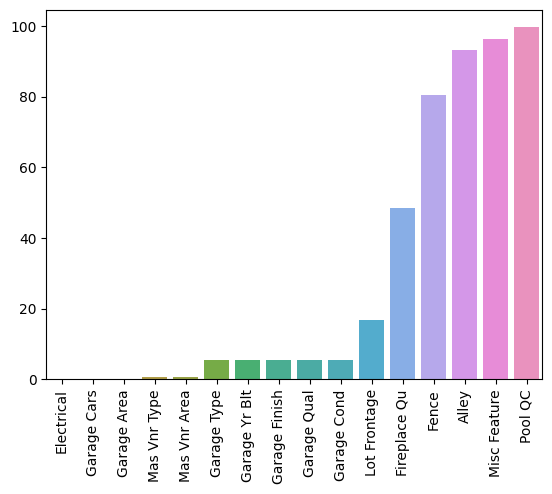

In [35]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [36]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Cars'])

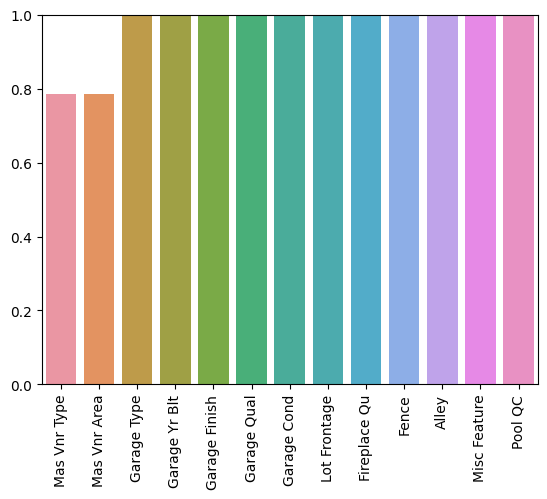

In [37]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1);

In [38]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

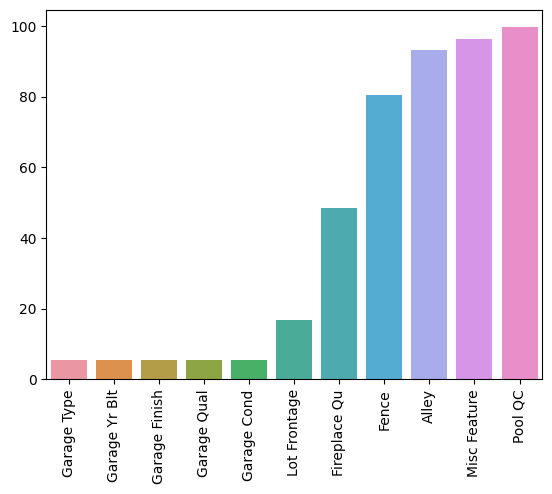

In [39]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [40]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

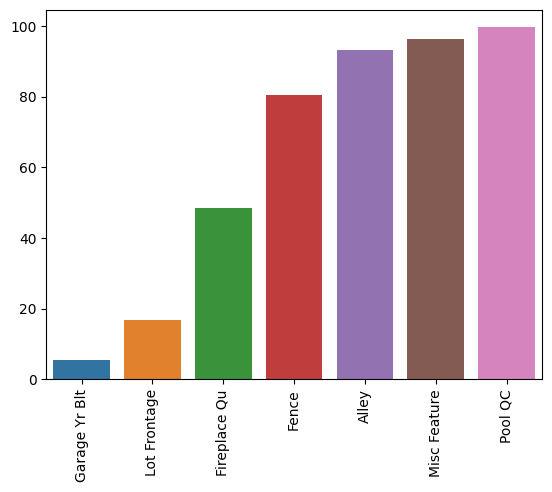

In [41]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [42]:
df = df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis=1)

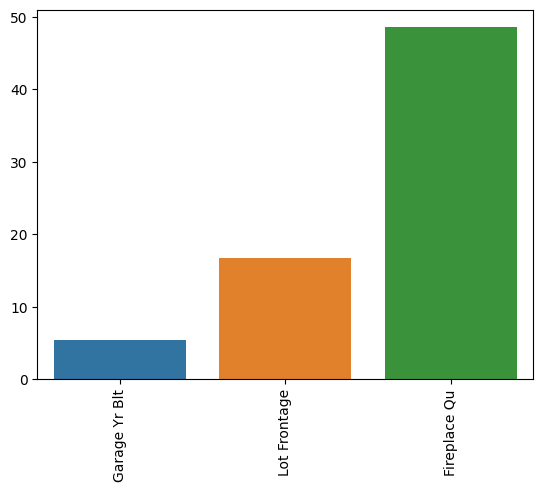

In [43]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [44]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

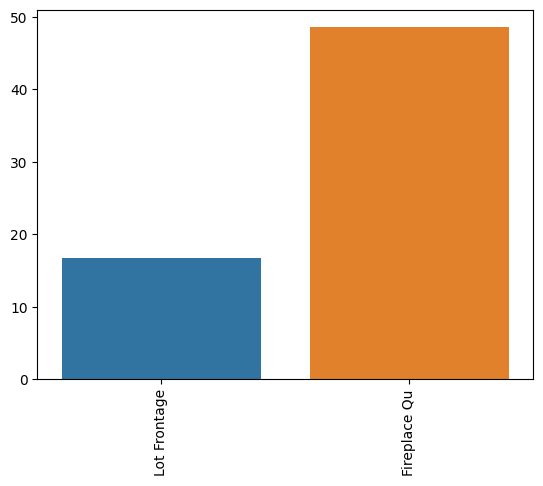

In [45]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [46]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

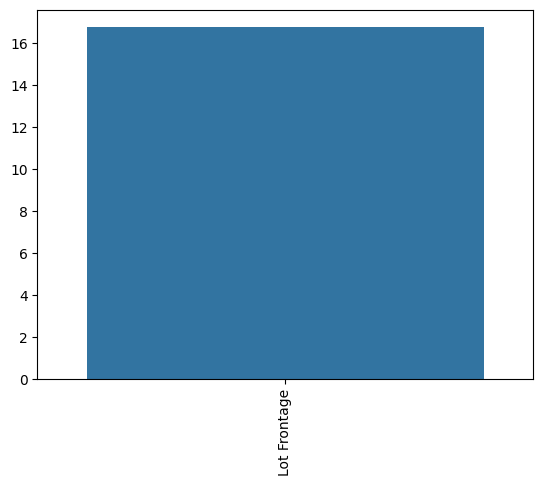

In [47]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [48]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

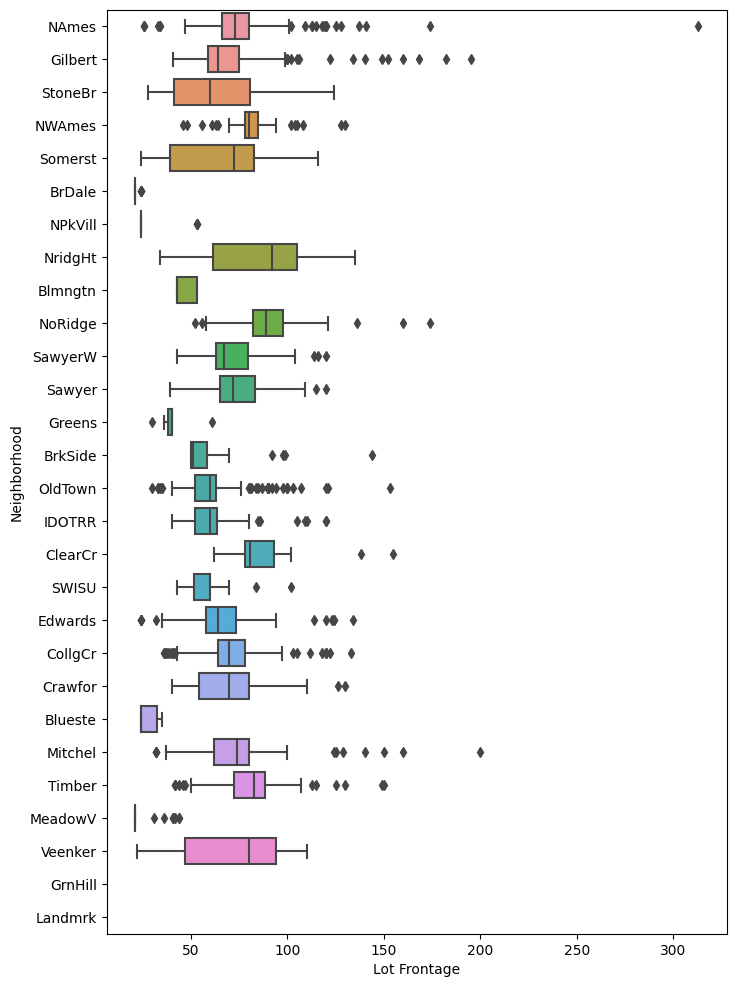

In [49]:
plt.figure(figsize=(8,12))

sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df)

In [50]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

In [51]:
df[['Neighborhood', 'Lot Frontage']]

,Neighborhood,Lot Frontage
0,NAmes,141.0
1,NAmes,80.0
2,NAmes,81.0
3,NAmes,93.0
4,Gilbert,74.0
...,...,...
2922,Mitchel,37.0
2923,Mitchel,NaN
2924,Mitchel,62.0
2925,Mitchel,77.0


import numpy as np
from google.colab import autoviz
df_5593924193444473634 = autoviz.get_registered_df('df_5593924193444473634')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5593924193444473634, *['Lot Frontage'], **{})
chart

import numpy as np
from google.colab import autoviz
df_258860016111332942 = autoviz.get_registered_df('df_258860016111332942')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_258860016111332942, *['Lot Frontage'], **{})
chart

In [52]:
df[['Neighborhood', 'Lot Frontage']].groupby('Neighborhood')

In [53]:
df[['Neighborhood', 'Lot Frontage']].groupby('Neighborhood').mean()

,Lot Frontage
Neighborhood,
Blmngtn,46.900000
Blueste,27.300000
BrDale,21.500000
BrkSide,55.789474
ClearCr,88.150000
CollgCr,71.336364
Crawfor,69.951807
Edwards,64.794286
Gilbert,74.207207


In [54]:
df['Lot Frontage'] = df['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [56]:
df['Lot Frontage'].mean()

69.0817248459959

In [58]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    53.237636
Blueste    27.300000
BrDale     21.500000
BrkSide    57.389467
ClearCr    77.749123
CollgCr    70.939480
Crawfor    69.782859
Edwards    65.153443
Gilbert    72.529777
Greens     44.510216
GrnHill    69.081725
IDOTRR     62.820547
Landmrk    69.081725
MeadowV    30.306132
Mitchel    73.868082
NAmes      74.269881
NPkVill    31.702759
NWAmes     77.150835
NoRidge    86.230836
NridgHt    83.911116
OldTown    62.082917
SWISU      59.902644
Sawyer     72.631334
SawyerW    70.428422
Somerst    65.047442
StoneBr    62.851149
Timber     78.721491
Veenker    71.027242
Name: Lot Frontage, dtype: float64

In [60]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [71]:
df['Lot Frontage'].isnull().sum()

0

In [72]:
percent_nan

Series([], dtype: float64)

In [73]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [74]:
percent_nan.isnull().sum()

0